
# Multiple Linear Regression


## Objetivos

Após completar estes exercícios você obterá conhecimentos nas seguintes áreas:

*   Usar a biblioteca scikit-learn para implementar Regressões Lineares Múltiplas
*   Criar, Treinar e Testar um modelo
*   Usar um modelo criado


<h1>Índice</h1>

<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ol>
        <li><a href="https://#entendendodados">Entendendo os Dados</a></li>
        <li><a href="https://#Lendodados">Lendo os Dados</a></li>
        <li><a href="https://#multipla">Modelo de Regressão Múltipla</a></li>
        <li><a href="https://#predicao">Predição</a></li>
        <li><a href="https://#pratica">Prática</a></li>
    </ol>
</div>
<br>
<hr>

### Importando os Pacotes necessários


In [336]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import pylab as pl
import numpy as np
import warnings
import os

%matplotlib inline
warnings.filterwarnings('ignore')

<h2 id="entendendodados">Entendendo os Dados</h2>

### `FuelConsumption.csv`:

Fizemos o download de um conjunto de dados de consumo de combustível, **FuelConsumption.csv**, que contém classificações de consumo de combustível específicas do modelo e emissões estimadas de dióxido de carbono para novos veículos leves para venda no varejo no Canadá. [Dataset source](http://open.canada.ca/data/en/dataset/98f1a129-f628-4ce4-b24d-6f16bf24dd64?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2022-01-01)

*   **MODELYEAR** e.g. 2014
*   **MAKE** e.g. Acura
*   **MODEL** e.g. ILX
*   **VEHICLE CLASS** e.g. SUV
*   **ENGINE SIZE** e.g. 4.7
*   **CYLINDERS** e.g 6
*   **TRANSMISSION** e.g. A6
*   **FUEL CONSUMPTION in CITY(L/100 km)** e.g. 9.9
*   **FUEL CONSUMPTION in HWY (L/100 km)** e.g. 8.9
*   **FUEL CONSUMPTION COMB (L/100 km)** e.g. 9.2
*   **CO2 EMISSIONS (g/km)** e.g. 182   --> low --> 0



<h2 id="reading_data">Lendo os Dados</h2>


In [337]:
# Path do dataset na máquina
path = r'./'
os.chdir(path)
os.listdir()

['AURA0168_AULA09-Simple-Linear-Regression.ipynb',
 'AURA0168_AULA09-Mulitple-Linear-Regression_v1.ipynb',
 'FuelConsumptionCo2.csv']

In [338]:
# Carregando o Dataset
df = pd.read_csv("FuelConsumptionCo2.csv")

In [339]:
# take a look at the dataset
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


### Data Exploration

Vamos primeiro fazer uma exploração descritiva em nossos dados. 

In [340]:
# Sumarizar os dados
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


Vamos selecionar algumas variáveis que queremos usar para regressão.

In [341]:
cdf = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY',
          'FUELCONSUMPTION_HWY','FUELCONSUMPTION_COMB',
          'CO2EMISSIONS']]
cdf.head(9)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,9.9,6.7,8.5,196
1,2.4,4,11.2,7.7,9.6,221
2,1.5,4,6.0,5.8,5.9,136
3,3.5,6,12.7,9.1,11.1,255
4,3.5,6,12.1,8.7,10.6,244
5,3.5,6,11.9,7.7,10.0,230
6,3.5,6,11.8,8.1,10.1,232
7,3.7,6,12.8,9.0,11.1,255
8,3.7,6,13.4,9.5,11.6,267


### Pearson Correlation

Checando a correlação entre as variáveis.

In [342]:
# Alterar Nomes das Colunas
df.rename(columns={'FUELCONSUMPTION_CITY': 'FUELCONSCITY',
                   'FUELCONSUMPTION_HWY': 'FUELCONSHWY',
                   'FUELCONSUMPTION_COMB': 'FUELCONSCOMB', 
                   'FUELCONSUMPTION_COMB_MPG': 'FUELCONSCOMBMPG'}, inplace=True)

In [343]:
# Plot de matriz de correlação (Pearson)
corr = df.iloc[:, 1:].corr() 
display(corr.style.background_gradient(cmap='BuGn').set_precision(2))

,ENGINESIZE,CYLINDERS,FUELCONSCITY,FUELCONSHWY,FUELCONSCOMB,FUELCONSCOMBMPG,CO2EMISSIONS
ENGINESIZE,1.00,0.93,0.83,0.78,0.82,-0.81,0.87
CYLINDERS,0.93,1.00,0.80,0.72,0.78,-0.77,0.85
FUELCONSCITY,0.83,0.80,1.00,0.97,1.00,-0.94,0.90
FUELCONSHWY,0.78,0.72,0.97,1.00,0.99,-0.89,0.86
FUELCONSCOMB,0.82,0.78,1.00,0.99,1.00,-0.93,0.89
FUELCONSCOMBMPG,-0.81,-0.77,-0.94,-0.89,-0.93,1.00,-0.91
CO2EMISSIONS,0.87,0.85,0.90,0.86,0.89,-0.91,1.00


## Data Visualization

Plot **Engine Size** vs the **Emission**, para ver o quão linear é o relacionamento entre eles.

Vamos plotar os valores de emissão em relação ao tamanho do motor:


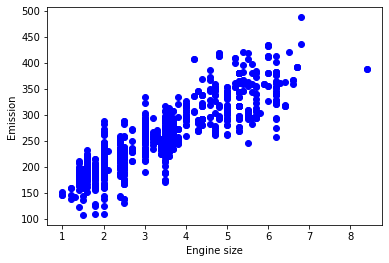

In [344]:
plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS,  color='blue')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

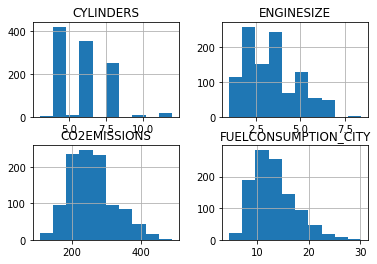

In [345]:
viz = cdf[['CYLINDERS','ENGINESIZE','CO2EMISSIONS','FUELCONSUMPTION_CITY']]
viz.hist()
plt.show()

#### Como criar um conjunto de dados de treinamento e teste

A divisão de treinamento/teste envolve a divisão do conjunto de dados em conjuntos de treinamento e teste, respectivamente, que são mutuamente exclusivos. Depois disso, você treina com o conjunto de treinamento e testa com o conjunto de teste.
<br><br>
Isso fornecerá uma avaliação mais precisa da precisão fora da amostra porque o conjunto de dados de teste não faz parte do conjunto de dados que foi usado para treinar o modelo. Portanto, isso nos dá uma melhor compreensão de quão bem nosso modelo generaliza em novos dados. 
<br><br>
Sabemos o resultado de cada ponto de dados no conjunto de dados de teste, tornando-o ótimo para testar! Como esses dados não foram usados para treinar o modelo, o modelo não tem conhecimento do resultado desses pontos de dados. Então, em essência, é realmente um teste fora da amostra.
<br><br>
Vamos dividir nosso conjunto de dados em conjuntos de treinamento e teste. Cerca de 80% de todo o conjunto de dados será usado para treinamento e 20% para teste. Criamos uma máscara para selecionar linhas aleatórias usando a função **np.random.rand()**:

In [346]:
msk = np.random.rand(len(df)) < 0.8
train = cdf[msk]
test = cdf[~msk]

In [347]:
print('Dataset de Treino = ', train.shape)
print('Dataset de Test   = ', test.shape)

Dataset de Treino =  (837, 6)
Dataset de Test   =  (230, 6)


#### Distribuição de dados de Treino


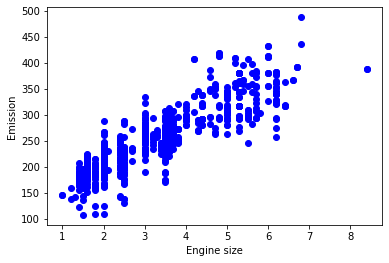

In [348]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='blue')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

<h2 id="multiple_regression_model">Modelo de Regressão Múltipla</h2>


Na realidade, existem múltiplas variáveis que impactam a emissão de co2. Quando mais de uma variável independente está presente, o processo é chamado de regressão linear múltipla.
<br><br>
Um exemplo de regressão linear múltipla é prever a emissão de co2 usando as variáveis FUELCONSUMPTION_COMB, EngineSize e Cylinders dos carros.
<br><br>
O bom aqui é que o modelo de regressão linear múltipla é a extensão do modelo de regressão linear simples.

In [349]:
from sklearn import linear_model

regr = linear_model.LinearRegression()
x = np.asanyarray(train[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']])
y = np.asanyarray(train[['CO2EMISSIONS']])

regr.fit (x, y)

# The coefficients
print ('Coefficients: ', regr.coef_)

Coefficients:  [[9.6658035  8.72344314 9.62132268]]


Conforme mencionado anteriormente, **Coeficiente** e **Intercepto** são os parâmetros da linha ajustada.
<br><br>
Dado que se trata de um modelo de regressão linear múltipla com 3 parâmetros e que os parâmetros são o intercepto e os coeficientes do hiperplano, sklearn pode estimá-los a partir de nossos dados. 
<br><br>
O Scikit-learn usa o método simples dos Mínimos Quadrados Ordinários para resolver este problema.

#### Ordinary Least Squares (OLS) - Mínimos Quadrados Ordinários

OLS é um método para estimar os parâmetros desconhecidos em um modelo de regressão linear. O OLS escolhe os parâmetros de uma função linear de um conjunto de variáveis explicativas minimizando a soma dos quadrados das diferenças entre a variável dependente alvo e aquelas previstas pela função linear.
<br><br>
Em outras palavras, ele tenta minimizar a soma dos erros quadráticos (SSE) ou erro quadrático médio (MSE) entre a variável de destino (y) e nossa saída prevista ($\hat{y}$) em todas as amostras no conjunto de dados.

OLS pode encontrar os melhores parâmetros usando os seguintes métodos:

*   Resolvendo os parâmetros do modelo analiticamente usando equações de forma fechada
*   Usando otimização de Algorítimo (Gradient Descent, Stochastic Gradient Descent, Newton’s Method, etc.)


<h2 id="predicao">Predição</h2>


In [350]:
y_hat= regr.predict(test[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']])
x = np.asanyarray(test[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']])

y = np.asanyarray(test[['CO2EMISSIONS']])

print("Residual sum of squares: %.2f" % np.mean((y_hat - y) ** 2))

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(x, y))

Residual sum of squares: 651.30
Variance score: 0.84


**Explicação: Pontuação de regressão de variância:**\
Seja $\hat{y}$ a saída-alvo estimada, y a saída-alvo correspondente (correta) e Var a variância (o quadrado do desvio padrão). Então a variância explicada é estimada da seguinte forma:

$\texttt{explainedVariance}(y, \hat{y}) = 1 - \frac{Var{ y - \hat{y}}}{Var{y}}$\
A melhor pontuação possível é 1,0, os valores mais baixos são piores.


<h2 id="practice">Prática</h2>
Tente usar uma regressão linear múltipla com o mesmo conjunto de dados, mas desta vez use FUELCONSUMPTION_CITY e FUELCONSUMPTION_HWY em vez de FUELCONSUMPTION_COMB.<br>

**Isso resulta em melhor precisão?**


In [351]:
msk = np.random.rand(len(df)) < 0.8
train = cdf[msk]
test = cdf[~msk]

In [352]:
# write your code here
# CENÁRIO FUEL CONSUMPTION CITY
from sklearn import linear_model

regr = linear_model.LinearRegression()
x = np.asanyarray(train[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_HWY','FUELCONSUMPTION_CITY']])
y = np.asanyarray(train[['CO2EMISSIONS']])

regr.fit (x, y)

# The coefficients
print ('Coefficients: ', regr.coef_)

Coefficients:  [[10.23578773  7.36837291  3.34023678  6.29693707]]


In [353]:
y_hat= regr.predict(test[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_HWY','FUELCONSUMPTION_CITY']])
x = np.asanyarray(test[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_HWY','FUELCONSUMPTION_CITY']])

y = np.asanyarray(test[['CO2EMISSIONS']])

print("Residual sum of squares: %.2f" % np.mean((y_hat - y) ** 2))

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(x, y))

Residual sum of squares: 540.78
Variance score: 0.86


<h4>ISSO RESULTOU EM MAIOR PRECISÃO</h4>

### Thank you